In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [ ]:
%cd sdt

In [ ]:
!python -m pip install .

In [ ]:
%cd ..

In [5]:
import sdt.sdt.changepoint as detection

In [6]:
def read_csv(filename):
    path = Path("")
    csv_path = path.joinpath(filename)
    lines = [x.strip() for x in open(csv_path, 'r').readlines()][1:]
    value_list = lines[0].split(',')
    value_list.pop(0)
    value_list = [float(i) for i in value_list]
    return value_list

In [7]:
def bayesian_online(data,past,threshold):
    det = detection.BayesOnline()
    chp_online = det.find_changepoints(data,past=past,prob_threshold=threshold)
    # plt.figure(figsize=(10,6))
    # plt.plot(data)
    # for i in chp_online:
    #     plt.axvline(i,color="red")
    # plt.title("Bayesian Online V1")
    # plt.show()
    return chp_online

In [8]:
def compute_diff(data):
    diff = np.diff(data,axis=0)
    return diff.tolist()

In [9]:
def compute_heatmap(data):
    th = np.arange(0.1,1,0.1)
    past = np.arange(10,210,10)
    matrix = np.zeros((len(th),len(past)))
    for i,t in enumerate(th):
        for j,p in enumerate(past):
            chp = bayesian_online(data,p,t)
            matrix[i,j] = len(chp)

    mat = pd.DataFrame(matrix)
    mat.columns = past
    mat.index = th
    plt.figure(figsize=(10, 6))
    plt.xlabel("Past")
    plt.ylabel("Threshold")
    sns.heatmap(mat.iloc[::-1],annot=True,cmap='viridis')

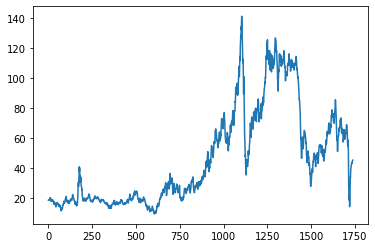

In [10]:
brent = read_csv("brent-monthly.csv")
brent = np.array(brent).reshape(-1,1)
plt.plot(brent)
plt.show()

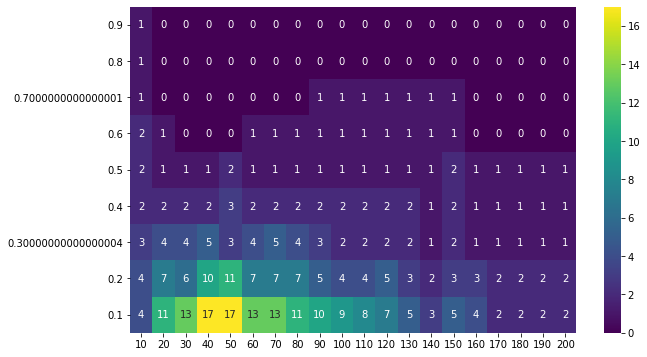

In [11]:
compute_heatmap(brent)

In [13]:
brent_diff = read_csv("brent-monthly.csv")
brent_diff = np.array(brent_diff).reshape(-1,1)

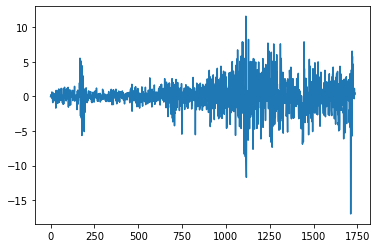

In [15]:
brent_diff = compute_diff(brent_diff)
plt.plot(brent_diff)
plt.show()

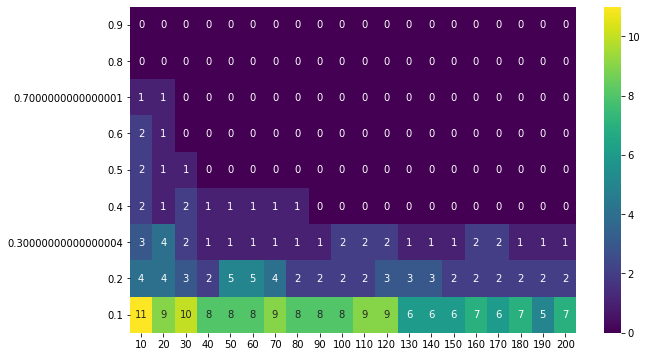

In [16]:
compute_heatmap(brent_diff)